In [1]:
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
city_data = 'Pyber/raw_data/city_data.csv'
ride_data = 'Pyber/raw_data/ride_data.csv'
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [3]:
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
city_counts = city_data_df['city'].value_counts()
city_counts.head()

Port James      2
Jeffreyton      1
Alvarezhaven    1
New Johnbury    1
Vickimouth      1
Name: city, dtype: int64

In [6]:
ride_counts = ride_data_df['city'].value_counts()
ride_counts.head()

Port Johnstad    34
Swansonbury      34
South Louis      32
Port James       32
West Peter       31
Name: city, dtype: int64

In [7]:
ride_group = ride_data_df.groupby('city')
fare = ride_group.mean()
fare_avg = fare[['fare']]
fare_avg.head()

,fare
city,
Alvarezhaven,23.928710
Alyssaberg,20.609615
Anitamouth,37.315556
Antoniomouth,23.625000
Aprilchester,21.981579


In [8]:
city_group = city_data_df.groupby('city')
driver = city_group.sum()
driver.head()

,driver_count
city,
Alvarezhaven,21
Alyssaberg,67
Anitamouth,16
Antoniomouth,21
Aprilchester,49


In [9]:
ride_counts_df = ride_data_df.groupby('city').count().reset_index().rename(columns={'Ride Count': 'Count'})
ride_counts_df = ride_counts_df[['city', 'date']]
ride_counts_df = ride_counts_df.rename(columns={'city':'city', 'date':'ride count'})
ride_counts_df.head()

,city,ride count
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [10]:
ride_counts_df.set_index('city', inplace=True)
ride_counts_df.head()

,ride count
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [11]:
print(fare_avg.head())
print(driver.head())
print(ride_counts_df.head())

                   fare
city                   
Alvarezhaven  23.928710
Alyssaberg    20.609615
Anitamouth    37.315556
Antoniomouth  23.625000
Aprilchester  21.981579
              driver_count
city                      
Alvarezhaven            21
Alyssaberg              67
Anitamouth              16
Antoniomouth            21
Aprilchester            49
              ride count
city                    
Alvarezhaven          31
Alyssaberg            26
Anitamouth             9
Antoniomouth          22
Aprilchester          19


In [12]:
merge = fare_avg.join(driver, how='outer')
merge.head()

,fare,driver_count
city,,
Alvarezhaven,23.928710,21
Alyssaberg,20.609615,67
Anitamouth,37.315556,16
Antoniomouth,23.625000,21
Aprilchester,21.981579,49


In [13]:
merge_df = merge.join(ride_counts_df, how='outer')
merge_df.head()

,fare,driver_count,ride count
city,,,
Alvarezhaven,23.928710,21,31
Alyssaberg,20.609615,67,26
Anitamouth,37.315556,16,9
Antoniomouth,23.625000,21,22
Aprilchester,21.981579,49,19


In [14]:
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [15]:
city_type = city_data_df[['city', 'type']]
city_type.set_index('city', inplace=True)
city_type.head()

,type
city,
Kelseyland,Urban
Nguyenbury,Urban
East Douglas,Urban
West Dawnfurt,Urban
Rodriguezburgh,Urban


In [16]:
merge_final = merge_df.join(city_type, how='outer')
merge_final.head()

,fare,driver_count,ride count,type
city,,,,
Alvarezhaven,23.928710,21,31,Urban
Alyssaberg,20.609615,67,26,Urban
Anitamouth,37.315556,16,9,Suburban
Antoniomouth,23.625000,21,22,Urban
Aprilchester,21.981579,49,19,Urban


In [17]:
x = merge_final['ride count']
y = merge_final['fare']
z = merge_final['driver_count']

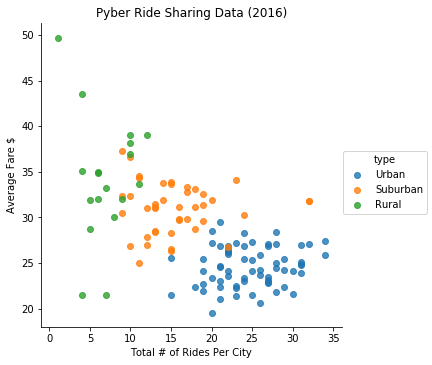

In [38]:
sns.lmplot(x='ride count', y='fare', data=merge_final, fit_reg=False, hue='type')
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total # of Rides Per City')
plt.ylabel('Average Fare $')
plt.savefig('sns.png')

In [19]:
fare_group = merge_final.groupby("type")
fare_df = fare_group[['type', 'fare']]
fare_pie = fare_df.sum()
fare_pie

,fare
type,
Rural,615.728572
Suburban,1300.433953
Urban,1623.863390


In [20]:
city_type = ['Rural', 'Suburban', 'Urban']
fare_total = [615.73, 1300.43, 1623.86]

In [21]:
ride_group = merge_final.groupby("type")
ride_df = ride_group[['type', 'ride count']]
ride_pie = ride_df.sum()
ride_pie

,ride count
type,
Rural,125
Suburban,657
Urban,1625


In [22]:
drive_group = merge_final.groupby("type")
drive_df = drive_group[['type', 'driver_count']]
drive_pie = drive_df.sum()
drive_pie

,driver_count
type,
Rural,104
Suburban,656
Urban,2607


In [26]:
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

([<matplotlib.patches.Wedge at 0x2a67cba9198>,
 [Text(-0.571604,0.939824,'Rural'),
  Text(-0.858,-0.688358,'Suburban'),
  Text(1.18992,0.155205,'Urban')],
 [Text(-0.311784,0.512631,'17.4%'),
  Text(-0.468,-0.375468,'36.7%'),
  Text(0.69412,0.0905363,'45.9%')])

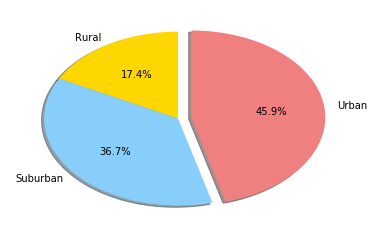

In [30]:
plt.pie(fare_total, explode=explode, labels=city_type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x2a67cf33940>,
 [Text(-0.178669,1.08539,'Rural'),
  Text(-1.01865,0.415142,'Suburban'),
  Text(1.02294,-0.627365,'Urban')],
 [Text(-0.0974556,0.592032,'5.2%'),
  Text(-0.55563,0.226441,'27.3%'),
  Text(0.596717,-0.365963,'67.5%')])

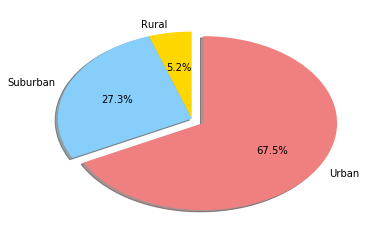

In [31]:
plt.pie(ride_pie, explode=explode, labels=city_type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x2a67cf7cef0>,
 [Text(-0.106574,1.09483,'Rural'),
  Text(-0.793797,0.761503,'Suburban'),
  Text(0.7814,-0.910722,'Urban')],
 [Text(-0.0581312,0.597177,'3.1%'),
  Text(-0.43298,0.415365,'19.5%'),
  Text(0.455817,-0.531254,'77.4%')])

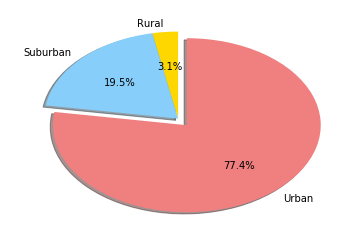

In [32]:
plt.pie(drive_pie, explode=explode, colors=colors, labels=city_type, autopct='%1.1f%%', shadow=True, startangle=90)